# BME690 Sensor Profile Analysis

This notebook analyzes sensor data from two test runs, showing the relationship between sensors and heater profiles.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## Load Data


In [12]:
# Load the two datasets
df1 = pd.read_csv('../Test Data/Profile Explorer-500s/output/bme_690_data_2_with_profiles.csv')
df2 = pd.read_csv('../Test Data/Profile Explorer-v1-D1/output/bme_690_data_3_with_profiles.csv')

print("Dataset 1 (Profile Explorer-500s):")
print(f"Shape: {df1.shape}")
print(f"Columns: {df1.columns.tolist()}")
print(f"\nUnique Sensors: {sorted(df1['Sensor Index'].unique())}")
print(f"Unique Heater Profiles: {sorted(df1['Heater_Profile'].unique())}")

print("\n" + "="*80 + "\n")

print("Dataset 2 (Profile Explorer-v1-D1):")
print(f"Shape: {df2.shape}")
print(f"Columns: {df2.columns.tolist()}")
print(f"\nUnique Sensors: {sorted(df2['Sensor Index'].unique())}")
print(f"Unique Heater Profiles: {sorted(df2['Heater_Profile'].unique())}")


Dataset 1 (Profile Explorer-500s):
Shape: (17914, 15)
Columns: ['Sensor Index', 'Sensor ID', 'Time Since PowerOn', 'Real time clock', 'Temperature', 'Pressure', 'Relative Humidity', 'Resistance Gassensor', 'Heater Profile Step Index', 'Scanning Mode Enabled', 'Scanning Cycle Index', 'Label Tag', 'Error Code', 'Time_Seconds', 'Heater_Profile']

Unique Sensors: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Unique Heater Profiles: ['heater_501', 'heater_502', 'heater_503', 'heater_504']


Dataset 2 (Profile Explorer-v1-D1):
Shape: (24023, 15)
Columns: ['Sensor Index', 'Sensor ID', 'Time Since PowerOn', 'Real time clock', 'Temperature', 'Pressure', 'Relative Humidity', 'Resistance Gassensor', 'Heater Profile Step Index', 'Scanning Mode Enabled', 'Scanning Cycle Index', 'Label Tag', 'Error Code', 'Time_Seconds', 'Heater_Profile']

Unique Sensors: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64

## Examine Sensor-Profile Mapping


In [13]:
# Get sensor-profile mapping for Dataset 1
print("Dataset 1 - Sensor to Profile Mapping:")
sensor_profile_map1 = df1.groupby('Sensor Index')['Heater_Profile'].apply(lambda x: x.mode()[0]).sort_index()
for sensor_idx, profile in sensor_profile_map1.items():
    sensor_id = df1[df1['Sensor Index'] == sensor_idx]['Sensor ID'].iloc[0]
    print(f"  Sensor {sensor_idx} (ID: {sensor_id}): {profile}")

print("\n" + "="*80 + "\n")

# Get sensor-profile mapping for Dataset 2
print("Dataset 2 - Sensor to Profile Mapping:")
sensor_profile_map2 = df2.groupby('Sensor Index')['Heater_Profile'].apply(lambda x: x.mode()[0]).sort_index()
for sensor_idx, profile in sensor_profile_map2.items():
    sensor_id = df2[df2['Sensor Index'] == sensor_idx]['Sensor ID'].iloc[0]
    print(f"  Sensor {sensor_idx} (ID: {sensor_id}): {profile}")


Dataset 1 - Sensor to Profile Mapping:
  Sensor 0 (ID: 506680586): heater_502
  Sensor 1 (ID: 506691081): heater_503
  Sensor 2 (ID: 506674191): heater_504
  Sensor 3 (ID: 506681869): heater_501
  Sensor 4 (ID: 506674954): heater_502
  Sensor 5 (ID: 506688778): heater_503
  Sensor 6 (ID: 506678794): heater_504
  Sensor 7 (ID: 506681096): heater_501


Dataset 2 - Sensor to Profile Mapping:
  Sensor 0 (ID: 506680586): heater_301
  Sensor 1 (ID: 506691081): heater_411
  Sensor 2 (ID: 506674191): heater_354
  Sensor 3 (ID: 506681869): heater_501
  Sensor 4 (ID: 506674954): heater_301
  Sensor 5 (ID: 506688778): heater_411
  Sensor 6 (ID: 506678794): heater_354
  Sensor 7 (ID: 506681096): heater_501


## Dataset 1: Profile Explorer-500s

### Visualize Gas Sensor Resistance over Time by Sensor and Profile


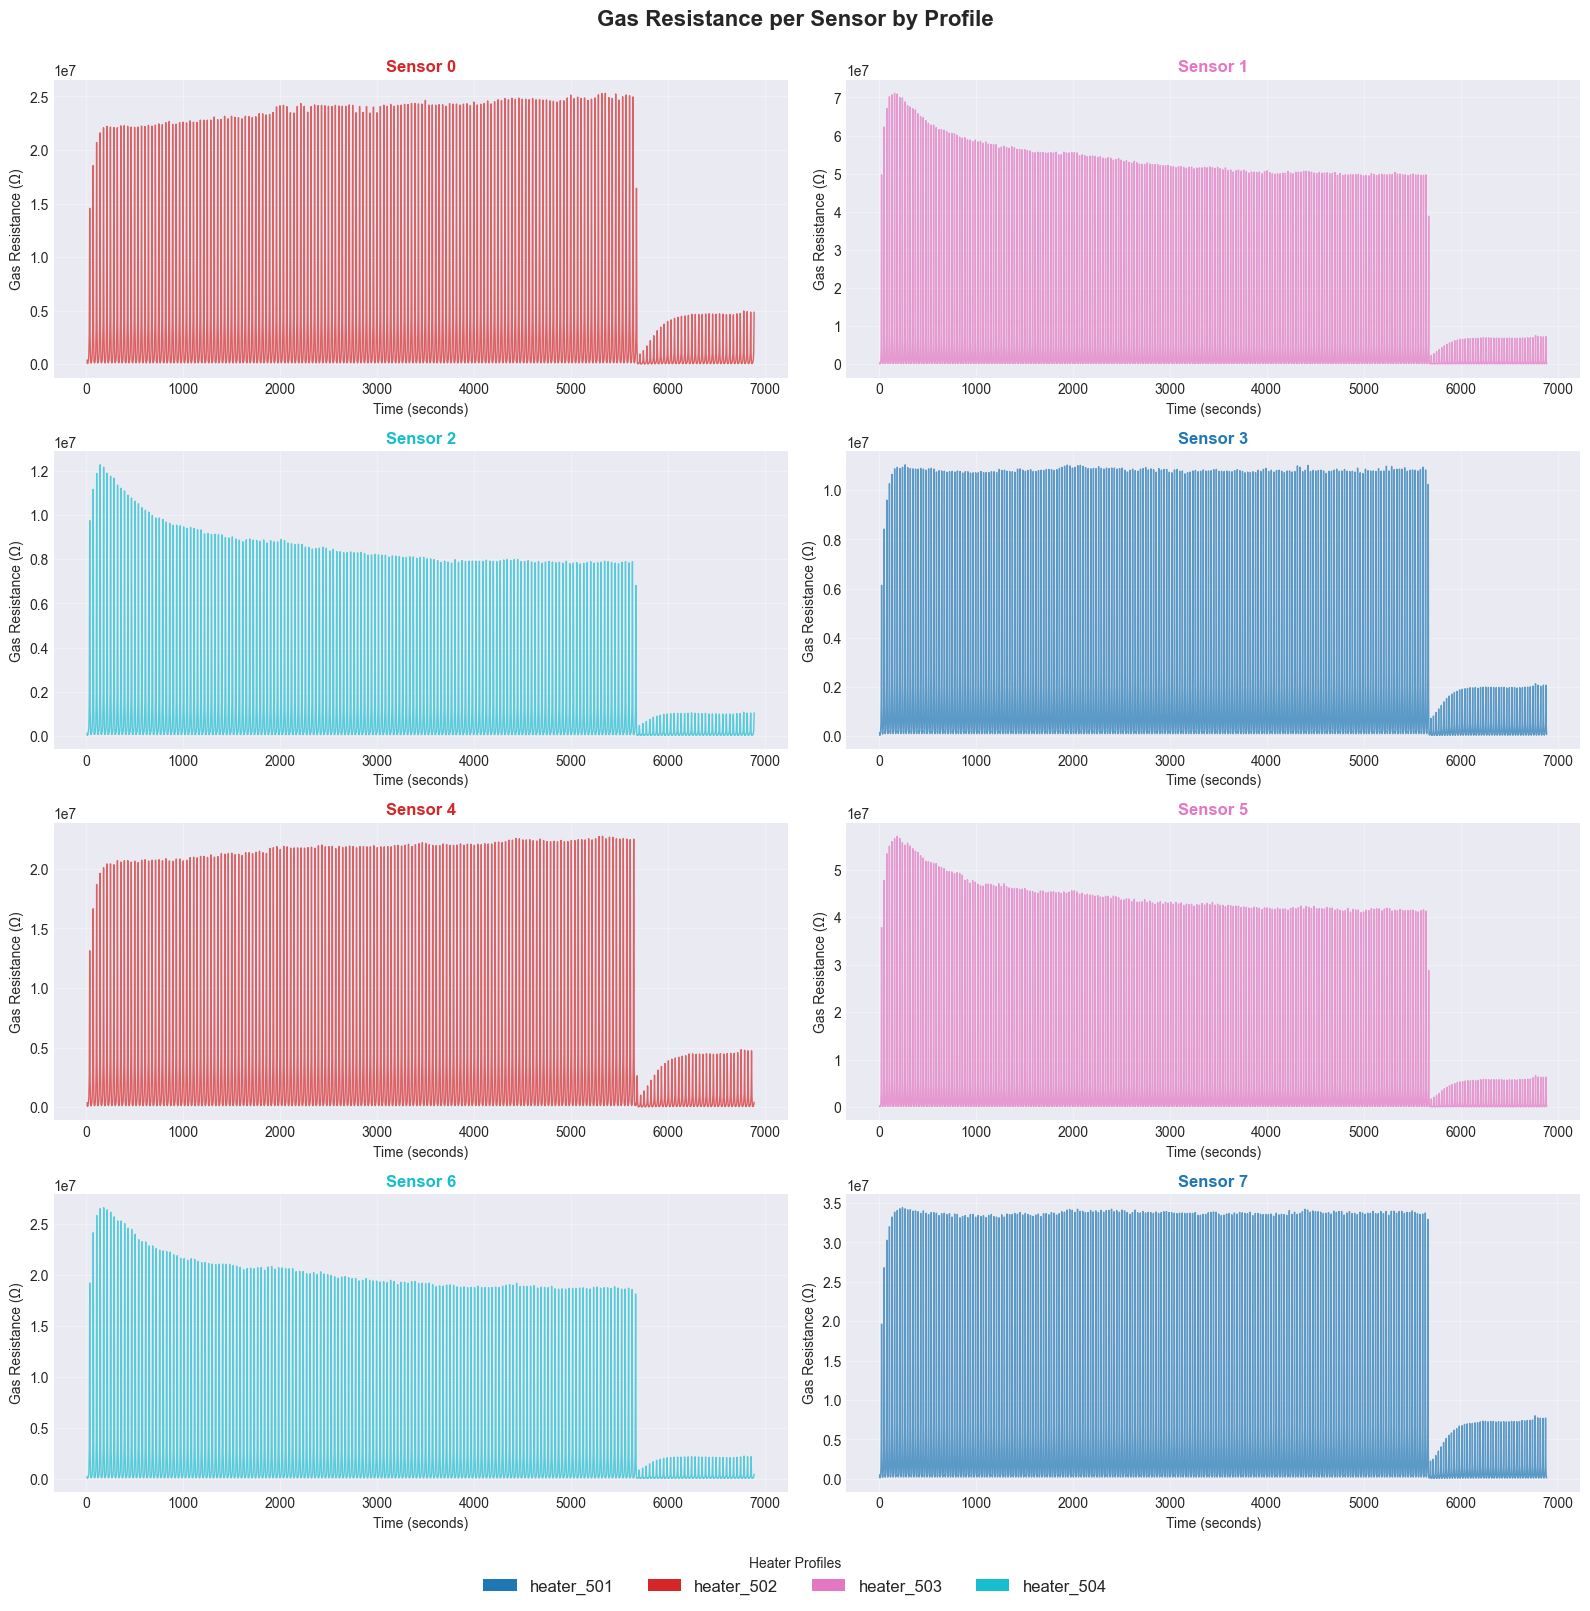


Dataset 1 Summary:
Total sensors: 8
Total profiles: 4
Profiles used: heater_501, heater_502, heater_503, heater_504


In [14]:
# Create figure for Dataset 1
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
fig.suptitle('Gas Resistance per Sensor by Profile', 
             fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Get unique profiles and assign colors
profiles1 = sorted(df1['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles1)))
profile_colors = dict(zip(profiles1, colors))

# Plot each sensor
for i, sensor_idx in enumerate(sorted(df1['Sensor Index'].unique())):
    ax = axes_flat[i]
    sensor_data = df1[df1['Sensor Index'] == sensor_idx]
    sensor_id = sensor_data['Sensor ID'].iloc[0]
    profile = sensor_profile_map1[sensor_idx]
    
    # Plot the data
    ax.plot(sensor_data['Time_Seconds'], 
            sensor_data['Resistance Gassensor'],
            color=profile_colors[profile],
            alpha=0.7,
            linewidth=1)
    
    ax.set_title(f'Sensor {sensor_idx}', 
                fontweight='bold',
                color=profile_colors[profile])
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Gas Resistance (Ω)')
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=profile_colors[p], label=p) for p in profiles1]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, 
          bbox_to_anchor=(0.5, -0.02), fontsize=12, title='Heater Profiles')

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.show()

# Print summary statistics
print("\nDataset 1 Summary:")
print(f"Total sensors: {len(df1['Sensor Index'].unique())}")
print(f"Total profiles: {len(profiles1)}")
print(f"Profiles used: {', '.join(profiles1)}")


## Dataset 2: Profile Explorer-v1-D1

### Visualize Gas Sensor Resistance over Time by Sensor and Profile


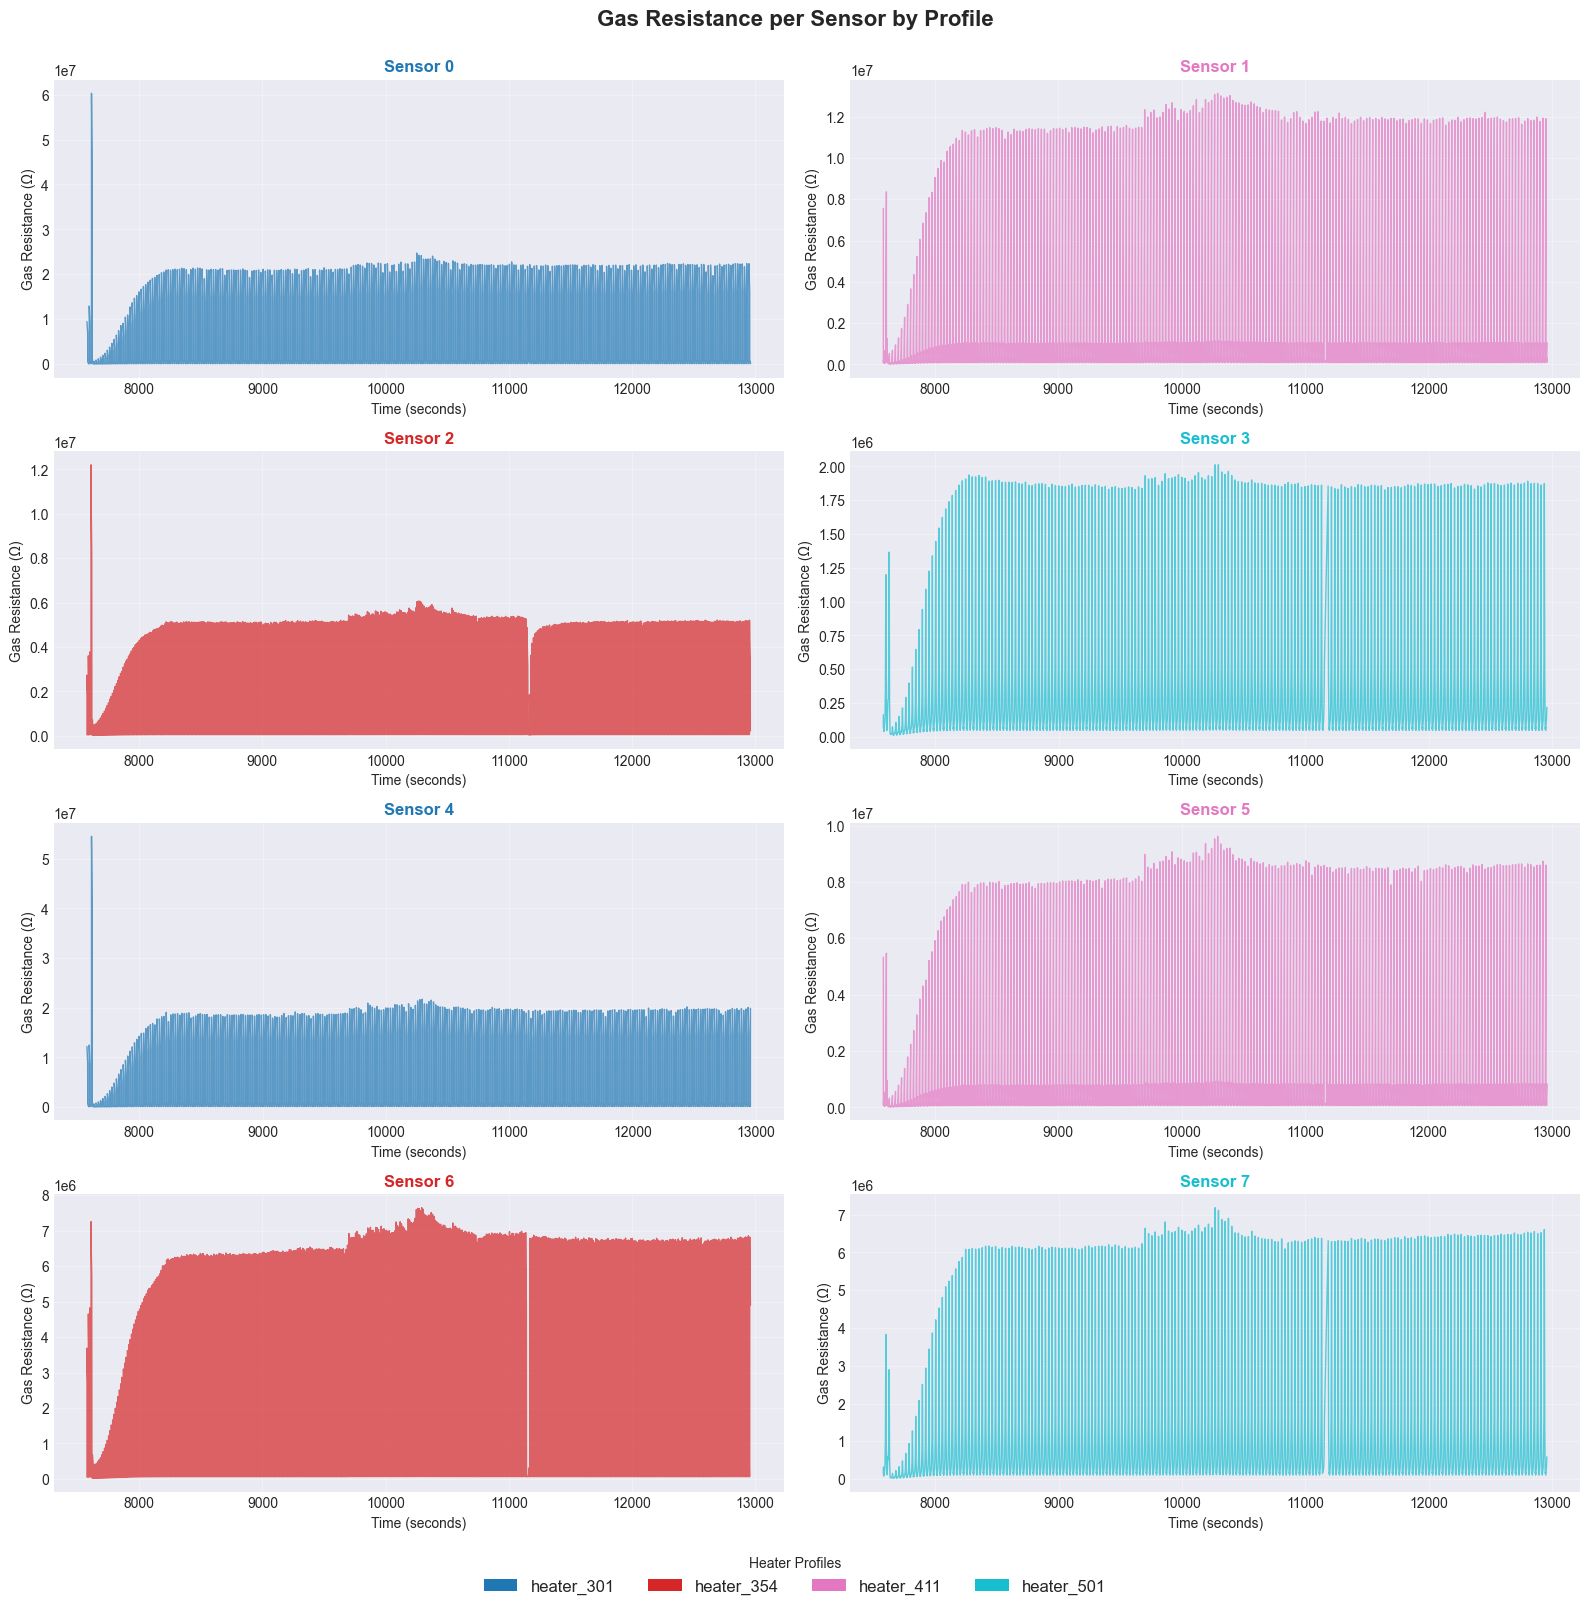


Dataset 2 Summary:
Total sensors: 8
Total profiles: 4
Profiles used: heater_301, heater_354, heater_411, heater_501


In [15]:
# Create figure for Dataset 2
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
fig.suptitle('Gas Resistance per Sensor by Profile', 
             fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes_flat = axes.flatten()

# Get unique profiles and assign colors
profiles2 = sorted(df2['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles2)))
profile_colors = dict(zip(profiles2, colors))

# Plot each sensor
for i, sensor_idx in enumerate(sorted(df2['Sensor Index'].unique())):
    ax = axes_flat[i]
    sensor_data = df2[df2['Sensor Index'] == sensor_idx]
    sensor_id = sensor_data['Sensor ID'].iloc[0]
    profile = sensor_profile_map2[sensor_idx]
    
    # Plot the data
    ax.plot(sensor_data['Time_Seconds'], 
            sensor_data['Resistance Gassensor'],
            color=profile_colors[profile],
            alpha=0.7,
            linewidth=1)
    
    ax.set_title(f'Sensor {sensor_idx}', 
                fontweight='bold',
                color=profile_colors[profile])
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Gas Resistance (Ω)')
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Create legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=profile_colors[p], label=p) for p in profiles2]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, 
          bbox_to_anchor=(0.5, -0.02), fontsize=12, title='Heater Profiles')

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.show()

# Print summary statistics
print("\nDataset 2 Summary:")
print(f"Total sensors: {len(df2['Sensor Index'].unique())}")
print(f"Total profiles: {len(profiles2)}")
print(f"Profiles used: {', '.join(profiles2)}")


## Additional Visualizations: Temperature Comparison


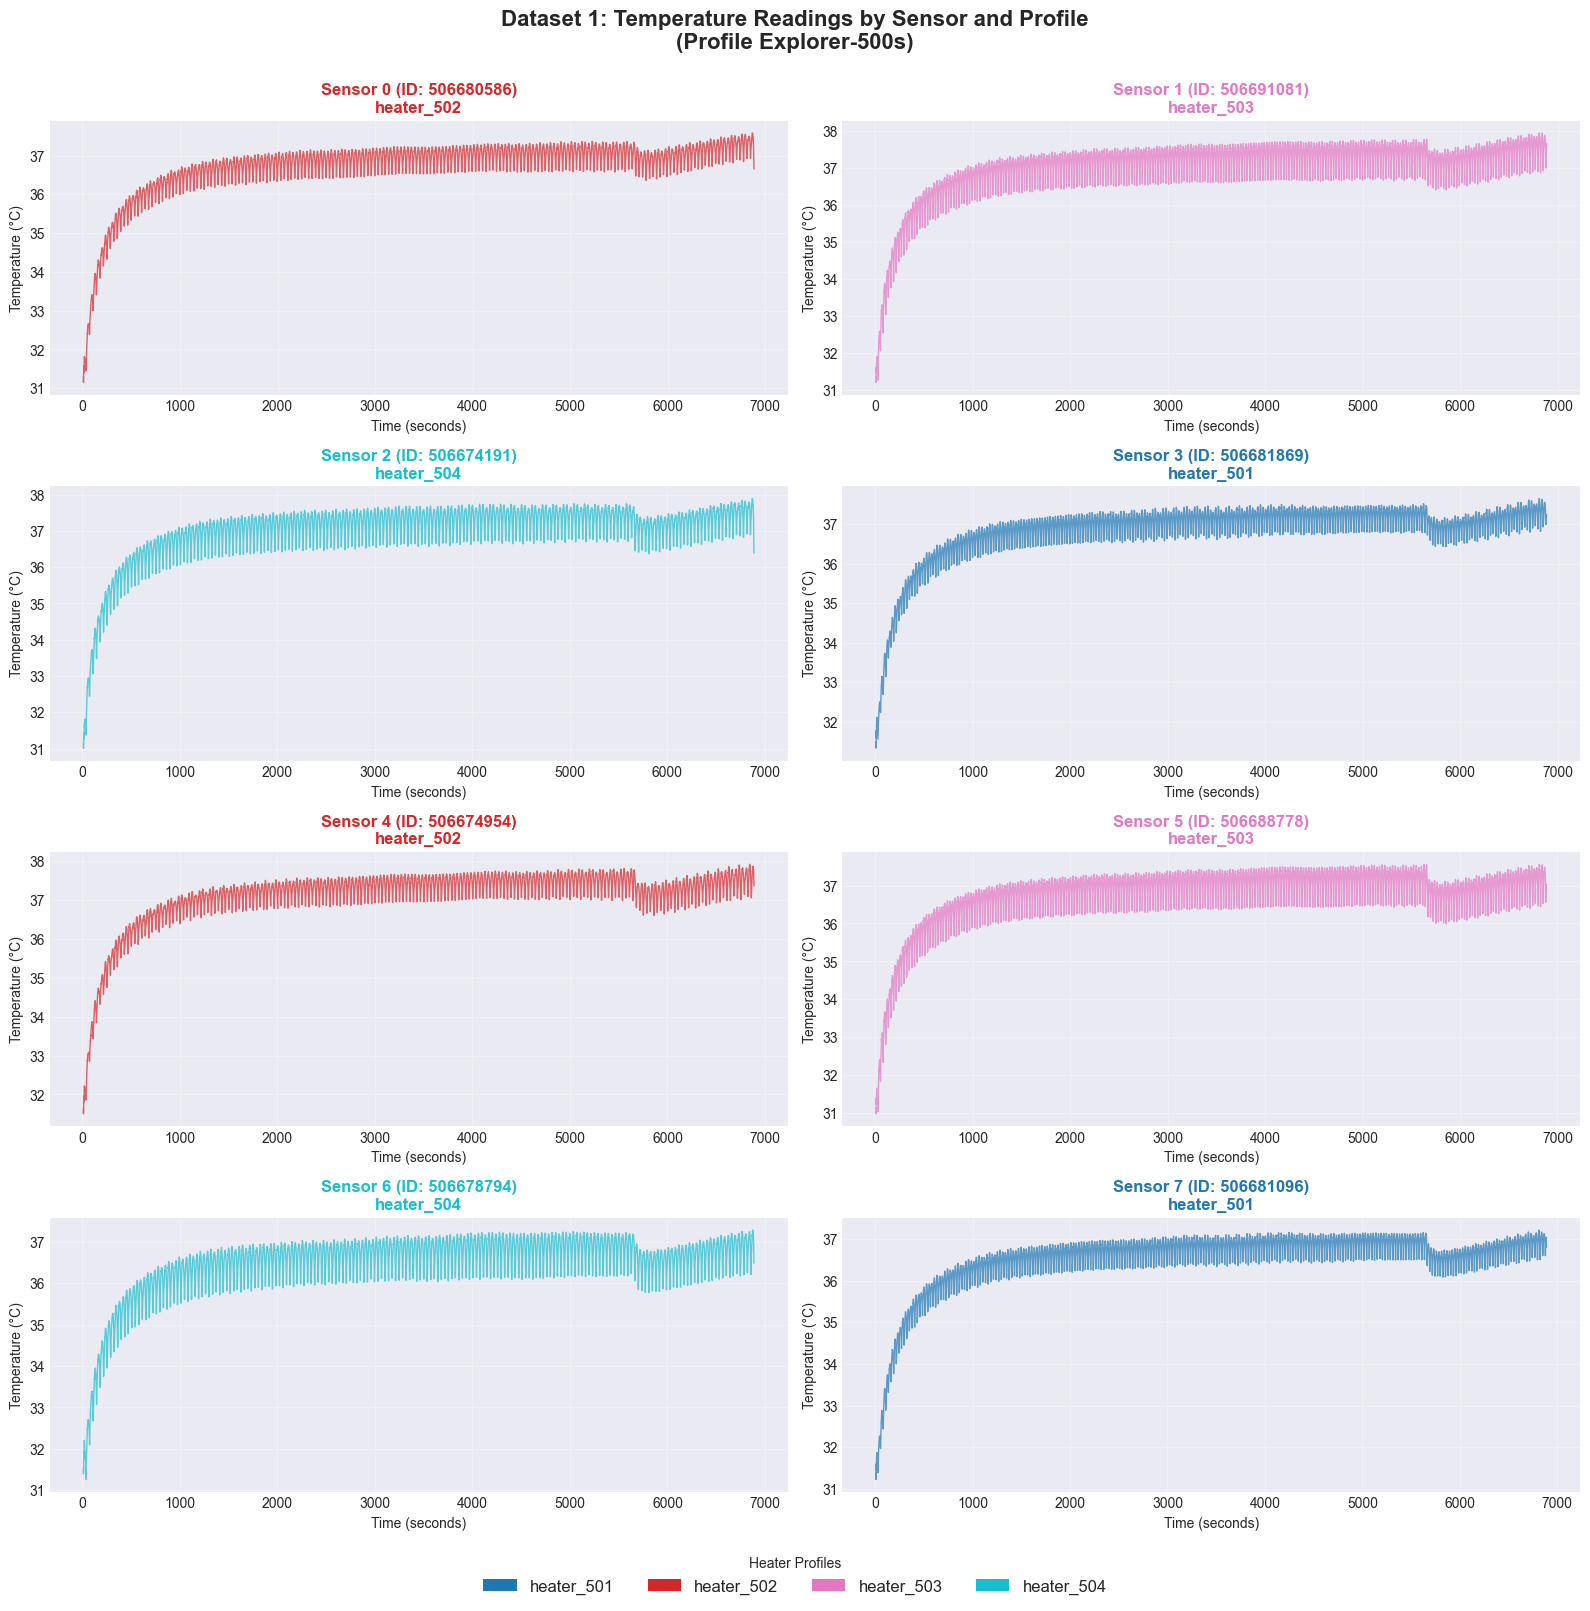

In [16]:
# Create figure for Dataset 1 - Temperature
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
fig.suptitle('Dataset 1: Temperature Readings by Sensor and Profile\n(Profile Explorer-500s)', 
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
profiles1 = sorted(df1['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles1)))
profile_colors = dict(zip(profiles1, colors))

for i, sensor_idx in enumerate(sorted(df1['Sensor Index'].unique())):
    ax = axes_flat[i]
    sensor_data = df1[df1['Sensor Index'] == sensor_idx]
    sensor_id = sensor_data['Sensor ID'].iloc[0]
    profile = sensor_profile_map1[sensor_idx]
    
    ax.plot(sensor_data['Time_Seconds'], 
            sensor_data['Temperature'],
            color=profile_colors[profile],
            alpha=0.7,
            linewidth=1)
    
    ax.set_title(f'Sensor {sensor_idx} (ID: {sensor_id})\n{profile}', 
                fontweight='bold',
                color=profile_colors[profile])
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Temperature (°C)')
    ax.grid(True, alpha=0.3)

legend_elements = [Patch(facecolor=profile_colors[p], label=p) for p in profiles1]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, 
          bbox_to_anchor=(0.5, -0.02), fontsize=12, title='Heater Profiles')

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.show()


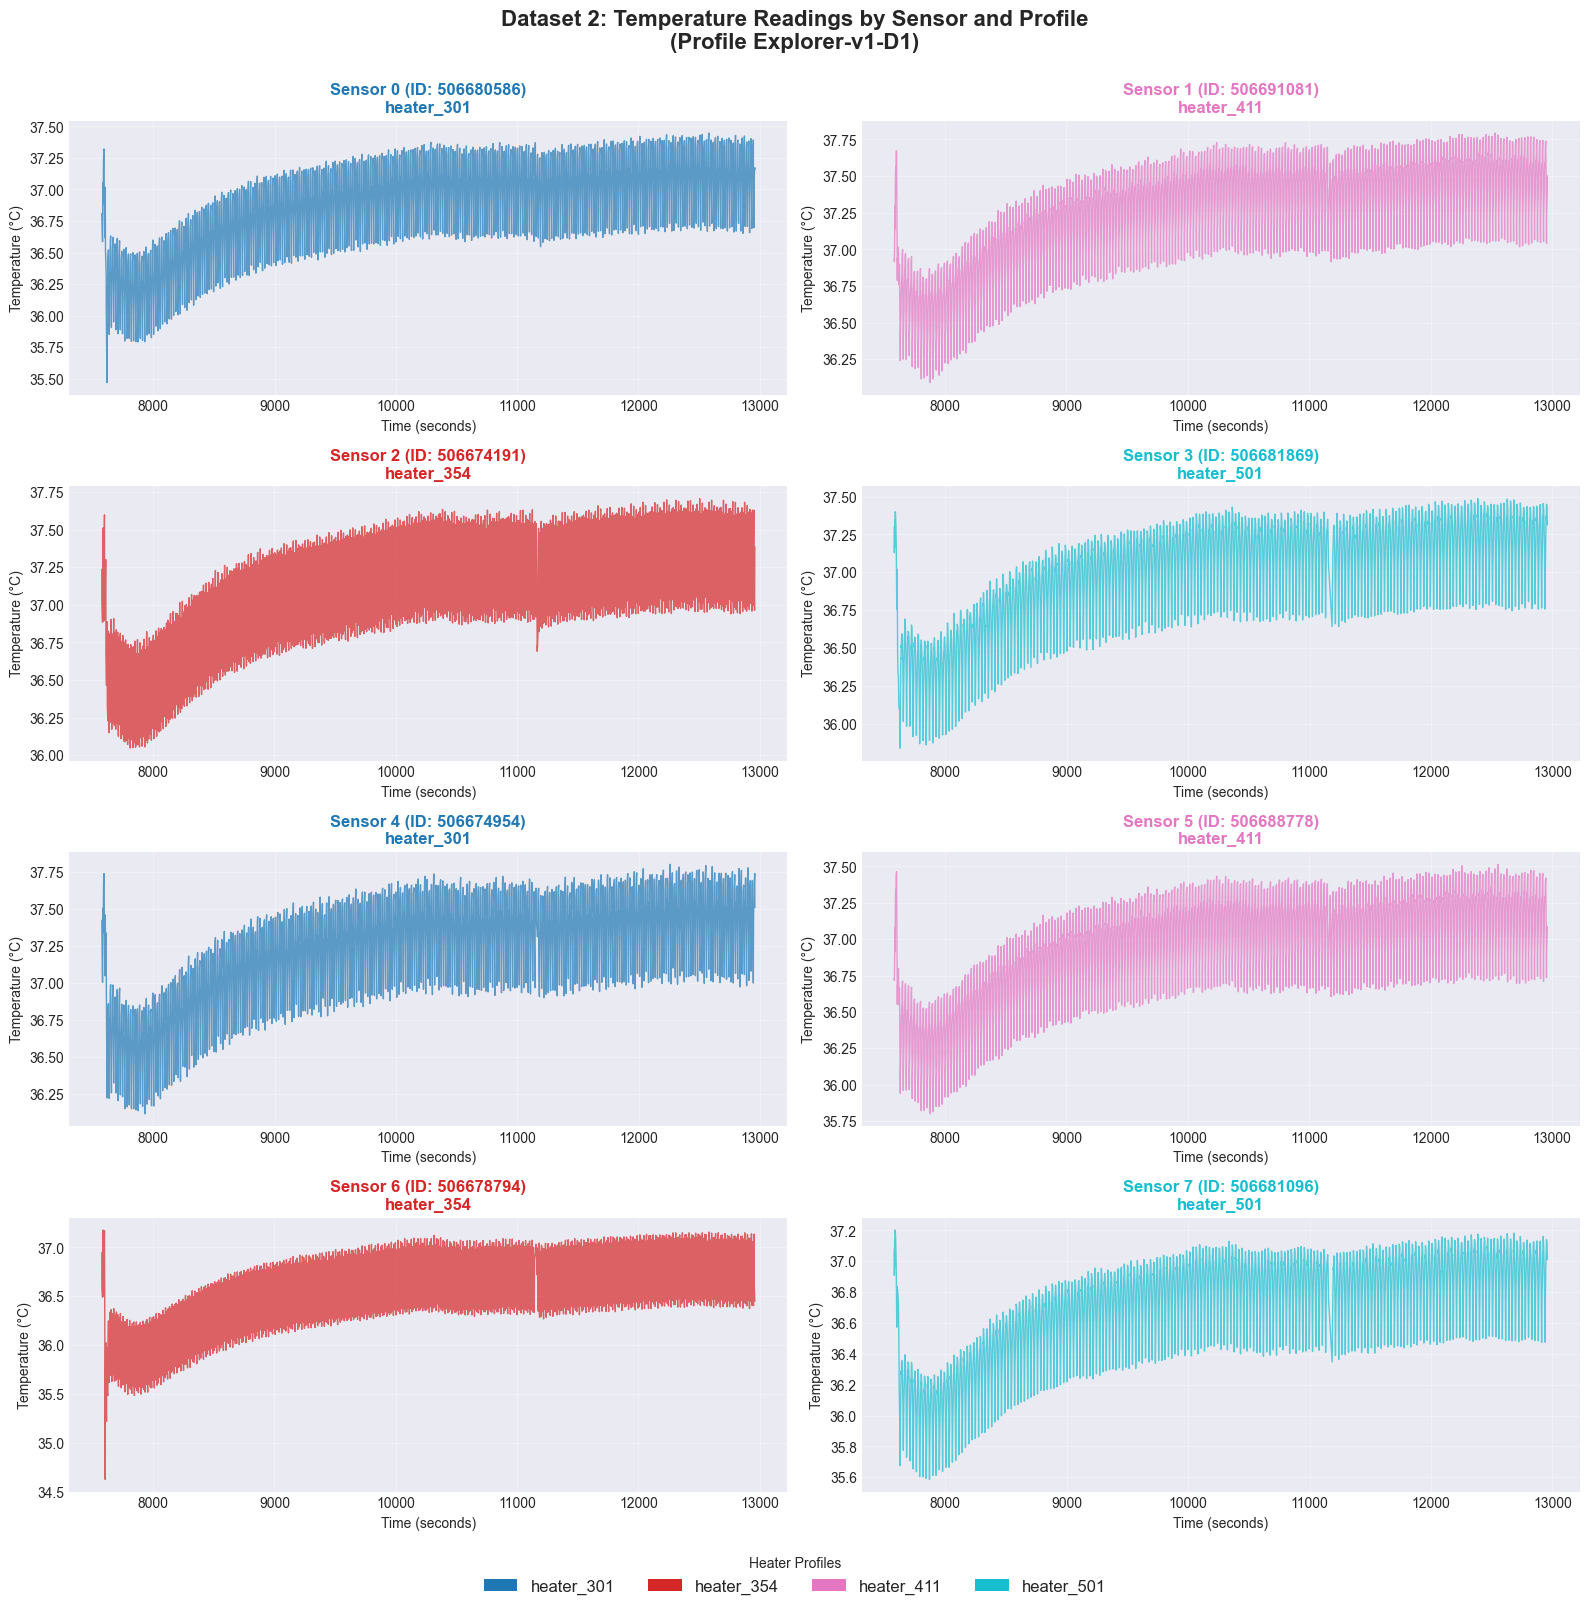

In [17]:
# Create figure for Dataset 2 - Temperature
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
fig.suptitle('Dataset 2: Temperature Readings by Sensor and Profile\n(Profile Explorer-v1-D1)', 
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
profiles2 = sorted(df2['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles2)))
profile_colors = dict(zip(profiles2, colors))

for i, sensor_idx in enumerate(sorted(df2['Sensor Index'].unique())):
    ax = axes_flat[i]
    sensor_data = df2[df2['Sensor Index'] == sensor_idx]
    sensor_id = sensor_data['Sensor ID'].iloc[0]
    profile = sensor_profile_map2[sensor_idx]
    
    ax.plot(sensor_data['Time_Seconds'], 
            sensor_data['Temperature'],
            color=profile_colors[profile],
            alpha=0.7,
            linewidth=1)
    
    ax.set_title(f'Sensor {sensor_idx} (ID: {sensor_id})\n{profile}', 
                fontweight='bold',
                color=profile_colors[profile])
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Temperature (°C)')
    ax.grid(True, alpha=0.3)

legend_elements = [Patch(facecolor=profile_colors[p], label=p) for p in profiles2]
fig.legend(handles=legend_elements, loc='lower center', ncol=4, 
          bbox_to_anchor=(0.5, -0.02), fontsize=12, title='Heater Profiles')

plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.show()


## Profile Distribution Analysis


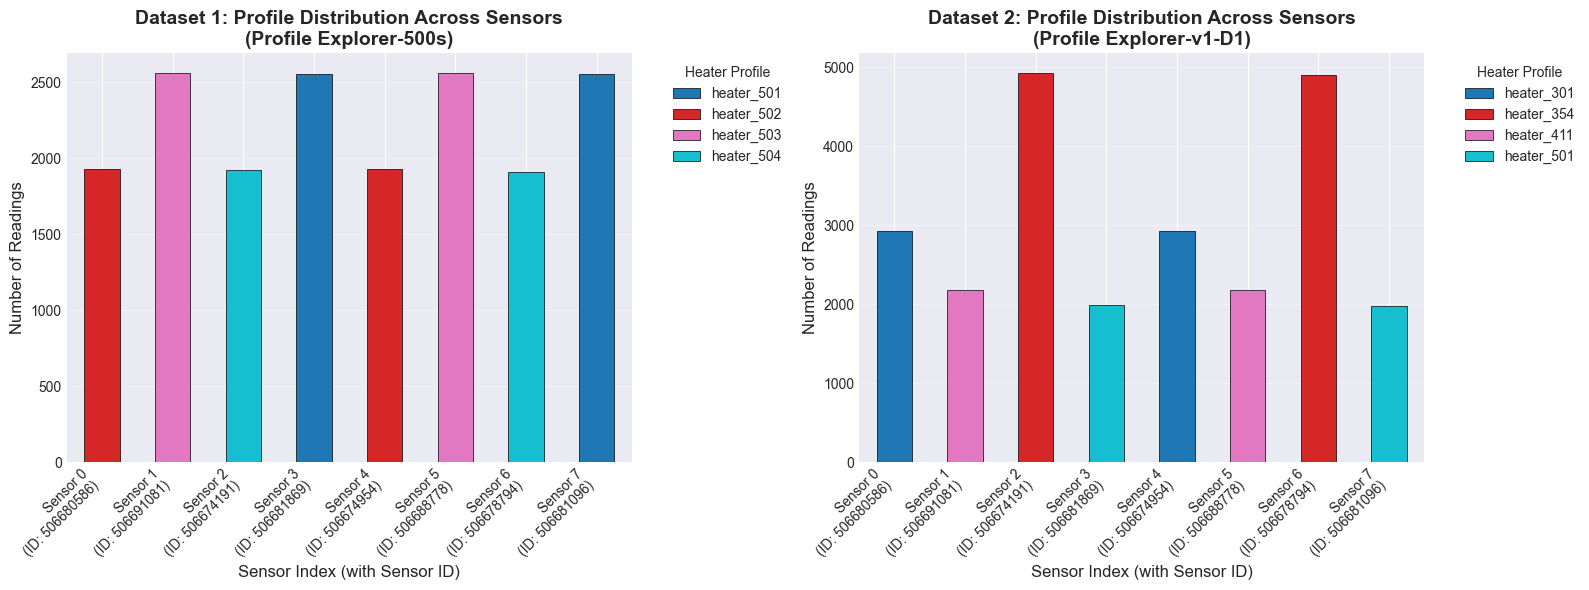

In [18]:
# Create a summary visualization showing which sensors use which profiles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Dataset 1
sensor_profile_counts1 = df1.groupby(['Sensor Index', 'Heater_Profile']).size().unstack(fill_value=0)
sensor_labels1 = [f"Sensor {idx}\n(ID: {df1[df1['Sensor Index']==idx]['Sensor ID'].iloc[0]})" 
                 for idx in sensor_profile_counts1.index]

sensor_profile_counts1.plot(kind='bar', stacked=True, ax=ax1, 
                           colormap='tab10', edgecolor='black', linewidth=0.5)
ax1.set_title('Dataset 1: Profile Distribution Across Sensors\n(Profile Explorer-500s)', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Sensor Index (with Sensor ID)', fontsize=12)
ax1.set_ylabel('Number of Readings', fontsize=12)
ax1.set_xticklabels(sensor_labels1, rotation=45, ha='right')
ax1.legend(title='Heater Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, axis='y')

# Dataset 2
sensor_profile_counts2 = df2.groupby(['Sensor Index', 'Heater_Profile']).size().unstack(fill_value=0)
sensor_labels2 = [f"Sensor {idx}\n(ID: {df2[df2['Sensor Index']==idx]['Sensor ID'].iloc[0]})" 
                 for idx in sensor_profile_counts2.index]

sensor_profile_counts2.plot(kind='bar', stacked=True, ax=ax2, 
                           colormap='tab10', edgecolor='black', linewidth=0.5)
ax2.set_title('Dataset 2: Profile Distribution Across Sensors\n(Profile Explorer-v1-D1)', 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Sensor Index (with Sensor ID)', fontsize=12)
ax2.set_ylabel('Number of Readings', fontsize=12)
ax2.set_xticklabels(sensor_labels2, rotation=45, ha='right')
ax2.legend(title='Heater Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Cycle Means Analysis (Excluding First and Last 1000 Seconds)

Analyzing mean resistance values at each step for each cycle, excluding edge effects.


In [19]:
def calculate_cycle_means(df, sensor_idx, exclude_seconds=1000):
    """
    Calculate mean values at each step for each cycle, excluding first and last N seconds.
    
    Parameters:
    - df: DataFrame with sensor data
    - sensor_idx: Sensor index to analyze
    - exclude_seconds: Number of seconds to exclude from start and end of each cycle
    
    Returns:
    - DataFrame with cycle means per step
    """
    # Filter data for this sensor
    sensor_data = df[df['Sensor Index'] == sensor_idx].copy()
    
    # Get unique cycles
    cycles = sorted(sensor_data['Scanning Cycle Index'].unique())
    
    # Store results
    results = []
    
    for cycle in cycles:
        cycle_data = sensor_data[sensor_data['Scanning Cycle Index'] == cycle].copy()
        
        # Get time range for this cycle
        min_time = cycle_data['Time_Seconds'].min()
        max_time = cycle_data['Time_Seconds'].max()
        
        # Exclude first and last N seconds
        cycle_trimmed = cycle_data[
            (cycle_data['Time_Seconds'] >= min_time + exclude_seconds) &
            (cycle_data['Time_Seconds'] <= max_time - exclude_seconds)
        ]
        
        # Skip if cycle is too short (less than 2*exclude_seconds)
        if len(cycle_trimmed) == 0:
            continue
        
        # Calculate mean at each step
        step_means = cycle_trimmed.groupby('Heater Profile Step Index').agg({
            'Resistance Gassensor': 'mean',
            'Temperature': 'mean',
            'Pressure': 'mean',
            'Relative Humidity': 'mean'
        }).reset_index()
        
        step_means['Scanning Cycle Index'] = cycle
        results.append(step_means)
    
    if results:
        return pd.concat(results, ignore_index=True)
    else:
        return pd.DataFrame()

# Test the function on Dataset 1
print("Testing cycle means calculation on Dataset 1, Sensor 0...")
test_means = calculate_cycle_means(df1, 0)
print(f"Result shape: {test_means.shape}")
print(f"\nFirst few rows:")
print(test_means.head(10))


Testing cycle means calculation on Dataset 1, Sensor 0...
Result shape: (10, 6)

First few rows:
   Heater Profile Step Index  Resistance Gassensor  Temperature     Pressure  \
0                          0          7.914462e+05    36.947716  1010.867739   
1                          1          2.709882e+05    36.954242  1010.865768   
2                          2          2.867451e+05    37.073383  1010.869435   
3                          3          1.301636e+05    37.050459  1010.869075   
4                          4          2.422013e+05    37.166363  1010.860184   
5                          5          4.862534e+05    37.129945  1010.866916   
6                          6          1.211954e+06    37.022724  1010.874047   
7                          7          4.288838e+06    36.825835  1010.865153   
8                          8          2.324125e+07    36.470418  1010.840223   
9                          9          3.526622e+06    36.762739  1010.862361   

   Relative Humidity  

### Dataset 1: Cycle Means at Each Step (Per Sensor)


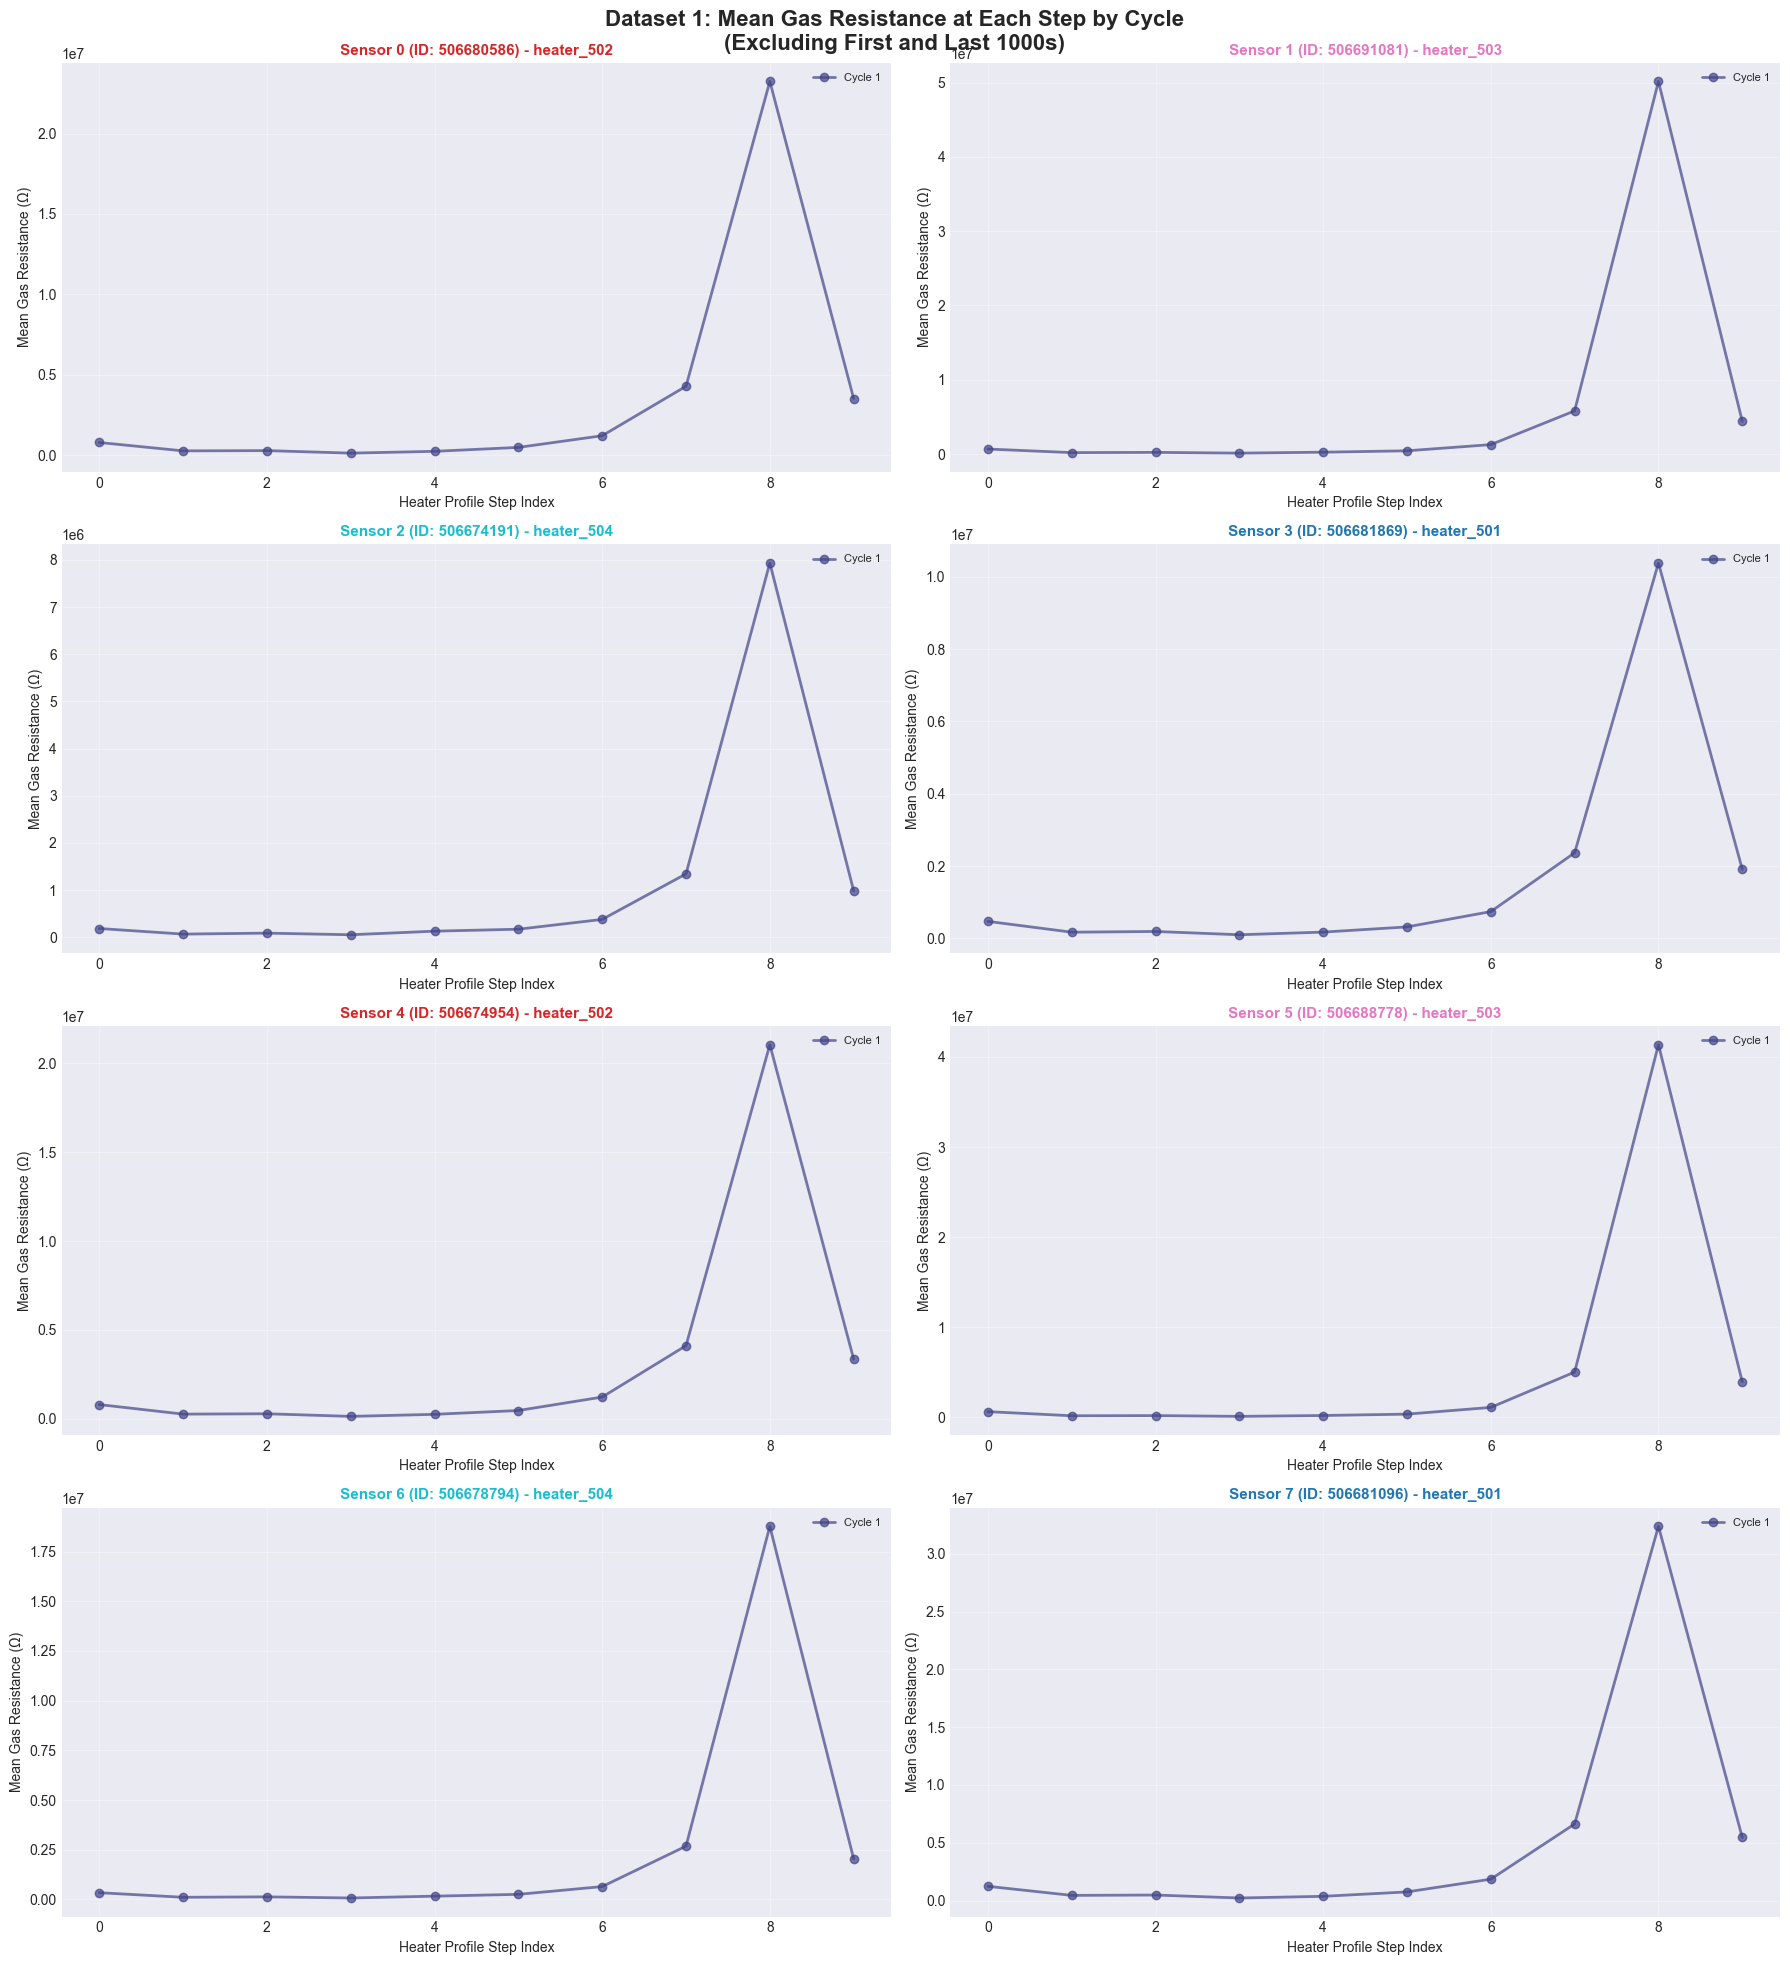


Dataset 1: Cycle means plotted for all sensors


In [20]:
# Dataset 1: Plot cycle means at each step for each sensor
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('Dataset 1: Mean Gas Resistance at Each Step by Cycle\n(Excluding First and Last 1000s)', 
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
profiles1 = sorted(df1['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles1)))
profile_colors = dict(zip(profiles1, colors))

for i, sensor_idx in enumerate(sorted(df1['Sensor Index'].unique())):
    ax = axes_flat[i]
    
    # Calculate cycle means for this sensor
    cycle_means = calculate_cycle_means(df1, sensor_idx, exclude_seconds=1000)
    
    if len(cycle_means) == 0:
        ax.text(0.5, 0.5, 'No data after trimming', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Sensor {sensor_idx}', fontweight='bold')
        continue
    
    # Get sensor info
    sensor_id = df1[df1['Sensor Index'] == sensor_idx]['Sensor ID'].iloc[0]
    profile = sensor_profile_map1[sensor_idx]
    
    # Plot each cycle
    cycles = sorted(cycle_means['Scanning Cycle Index'].unique())
    cycle_colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(cycles)))
    
    for j, cycle in enumerate(cycles):
        cycle_data = cycle_means[cycle_means['Scanning Cycle Index'] == cycle]
        ax.plot(cycle_data['Heater Profile Step Index'], 
                cycle_data['Resistance Gassensor'],
                marker='o',
                color=cycle_colors[j],
                alpha=0.7,
                linewidth=2,
                markersize=6,
                label=f'Cycle {cycle}')
    
    ax.set_title(f'Sensor {sensor_idx} (ID: {sensor_id}) - {profile}', 
                fontweight='bold',
                color=profile_colors[profile],
                fontsize=11)
    ax.set_xlabel('Heater Profile Step Index', fontsize=10)
    ax.set_ylabel('Mean Gas Resistance (Ω)', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax.legend(fontsize=8, loc='best', ncol=2)

plt.tight_layout()
plt.show()

print("\nDataset 1: Cycle means plotted for all sensors")


### Dataset 2: Cycle Means at Each Step (Per Sensor)


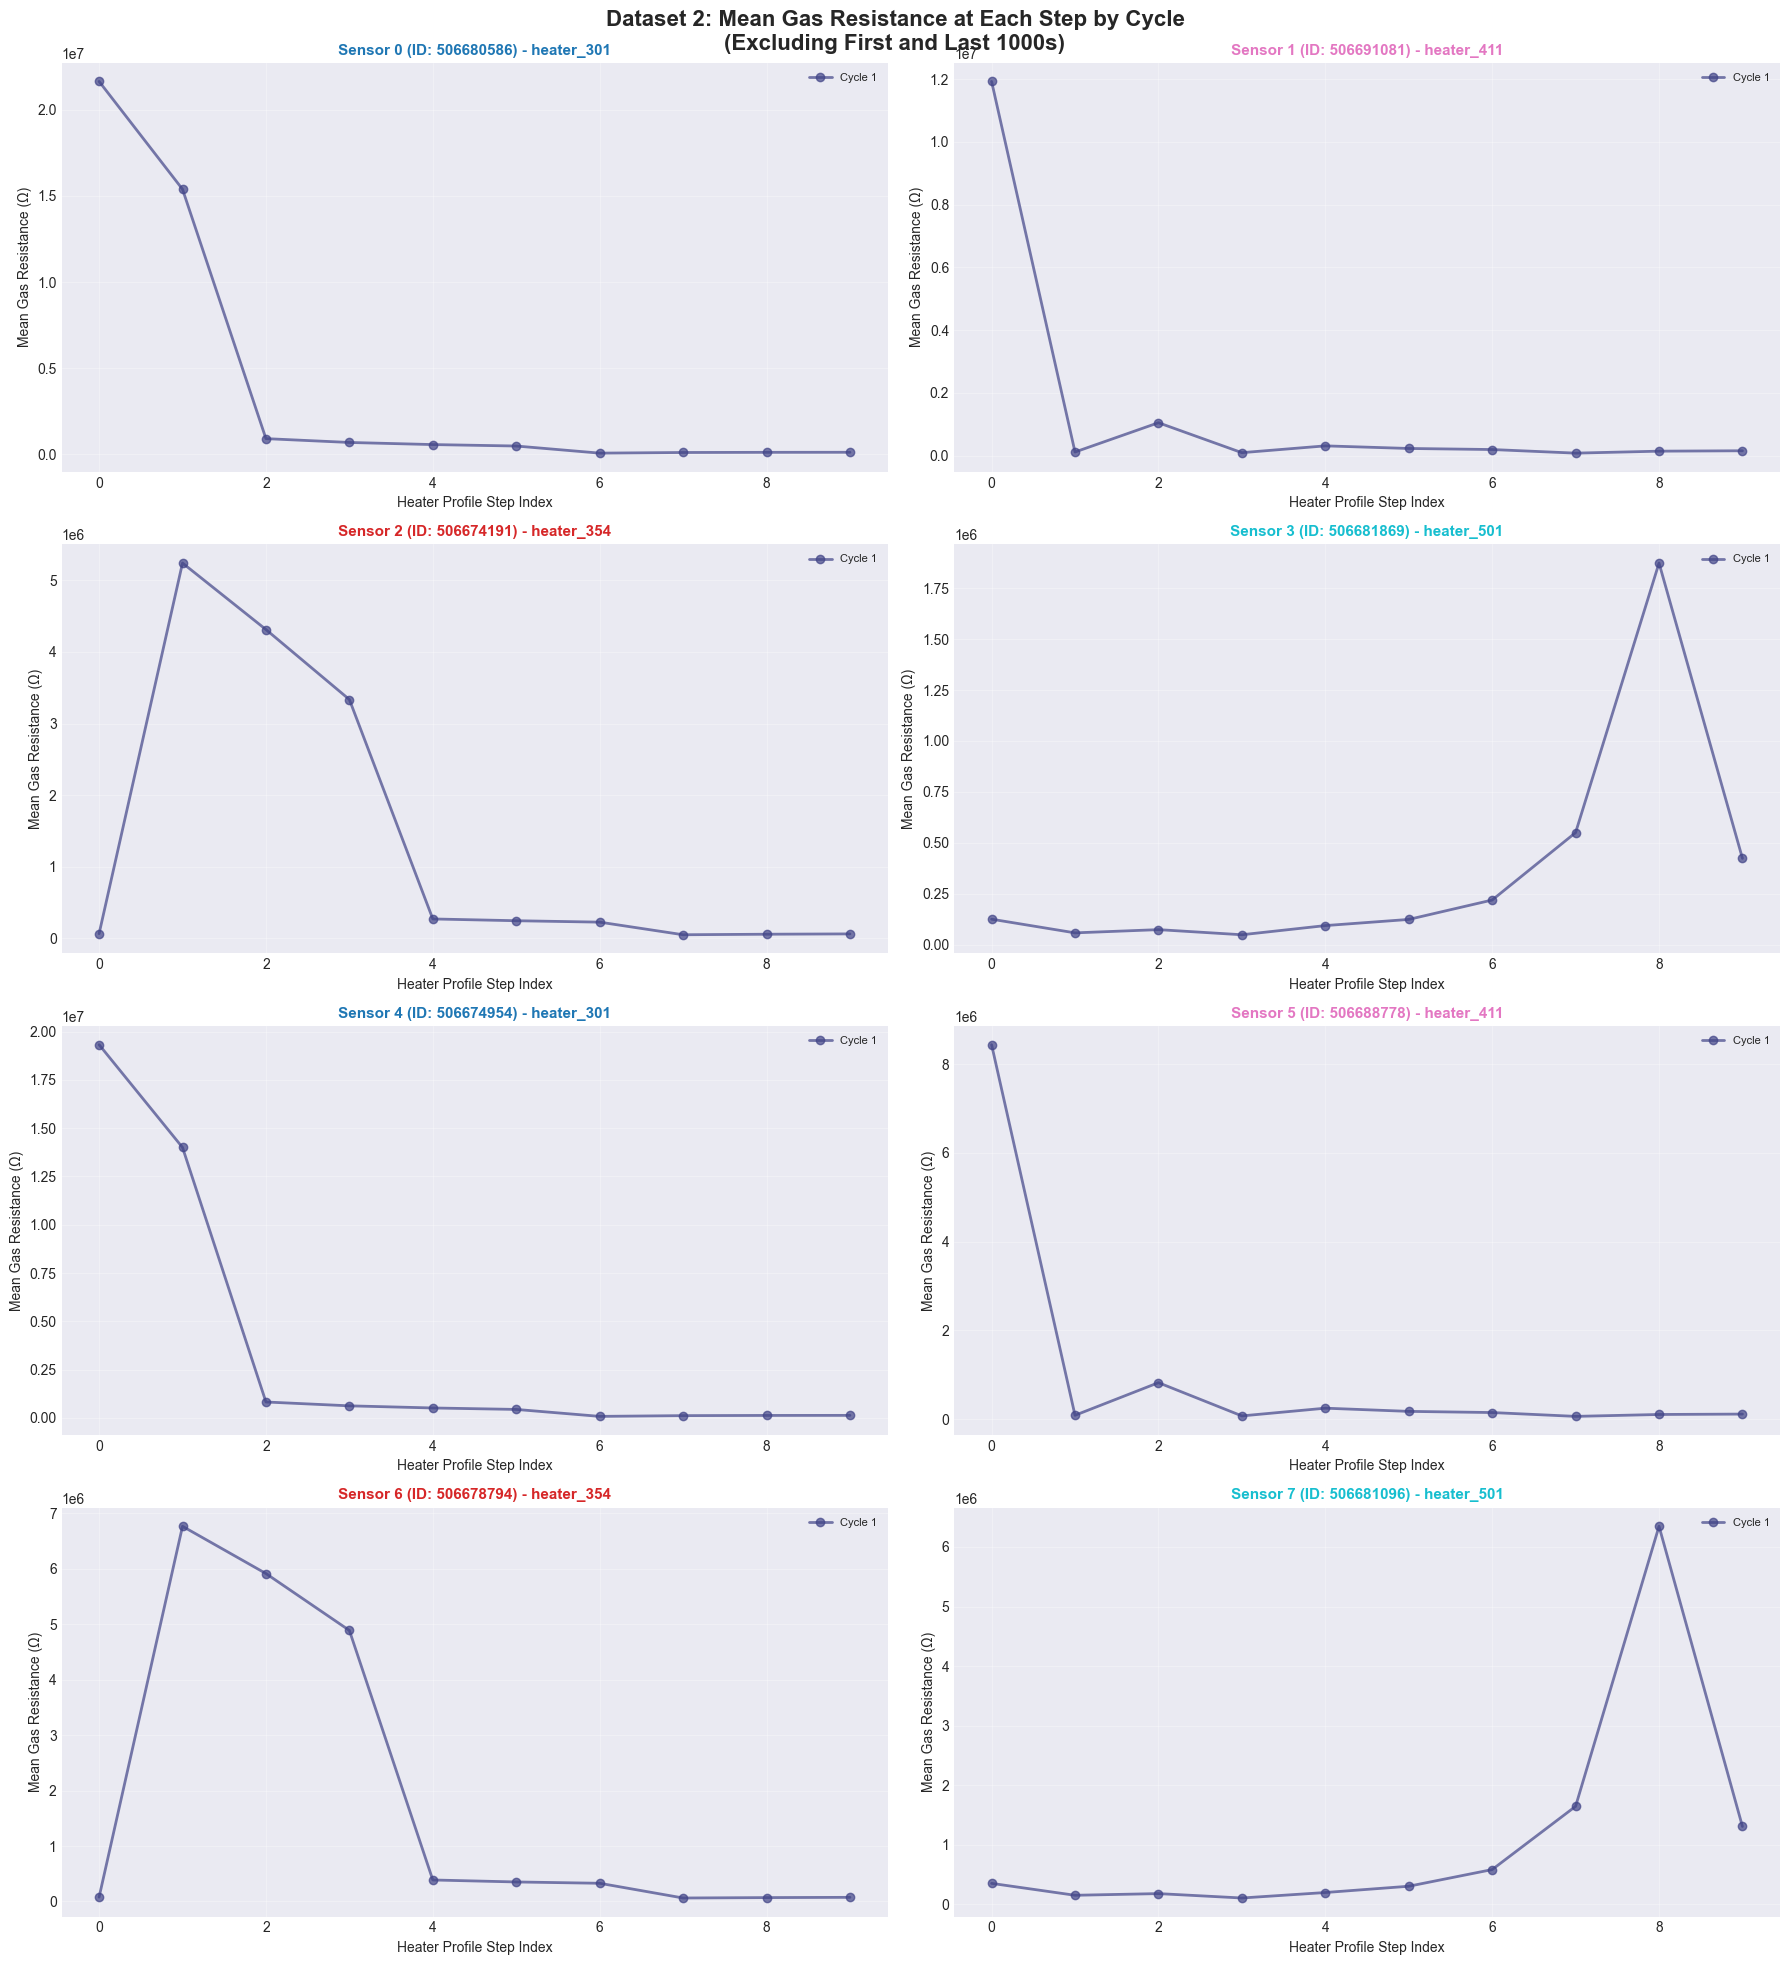


Dataset 2: Cycle means plotted for all sensors


In [21]:
# Dataset 2: Plot cycle means at each step for each sensor
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('Dataset 2: Mean Gas Resistance at Each Step by Cycle\n(Excluding First and Last 1000s)', 
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
profiles2 = sorted(df2['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles2)))
profile_colors = dict(zip(profiles2, colors))

for i, sensor_idx in enumerate(sorted(df2['Sensor Index'].unique())):
    ax = axes_flat[i]
    
    # Calculate cycle means for this sensor
    cycle_means = calculate_cycle_means(df2, sensor_idx, exclude_seconds=1000)
    
    if len(cycle_means) == 0:
        ax.text(0.5, 0.5, 'No data after trimming', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Sensor {sensor_idx}', fontweight='bold')
        continue
    
    # Get sensor info
    sensor_id = df2[df2['Sensor Index'] == sensor_idx]['Sensor ID'].iloc[0]
    profile = sensor_profile_map2[sensor_idx]
    
    # Plot each cycle
    cycles = sorted(cycle_means['Scanning Cycle Index'].unique())
    cycle_colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(cycles)))
    
    for j, cycle in enumerate(cycles):
        cycle_data = cycle_means[cycle_means['Scanning Cycle Index'] == cycle]
        ax.plot(cycle_data['Heater Profile Step Index'], 
                cycle_data['Resistance Gassensor'],
                marker='o',
                color=cycle_colors[j],
                alpha=0.7,
                linewidth=2,
                markersize=6,
                label=f'Cycle {cycle}')
    
    ax.set_title(f'Sensor {sensor_idx} (ID: {sensor_id}) - {profile}', 
                fontweight='bold',
                color=profile_colors[profile],
                fontsize=11)
    ax.set_xlabel('Heater Profile Step Index', fontsize=10)
    ax.set_ylabel('Mean Gas Resistance (Ω)', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax.legend(fontsize=8, loc='best', ncol=2)

plt.tight_layout()
plt.show()

print("\nDataset 2: Cycle means plotted for all sensors")


### Average Step Response (Mean Across All Cycles)


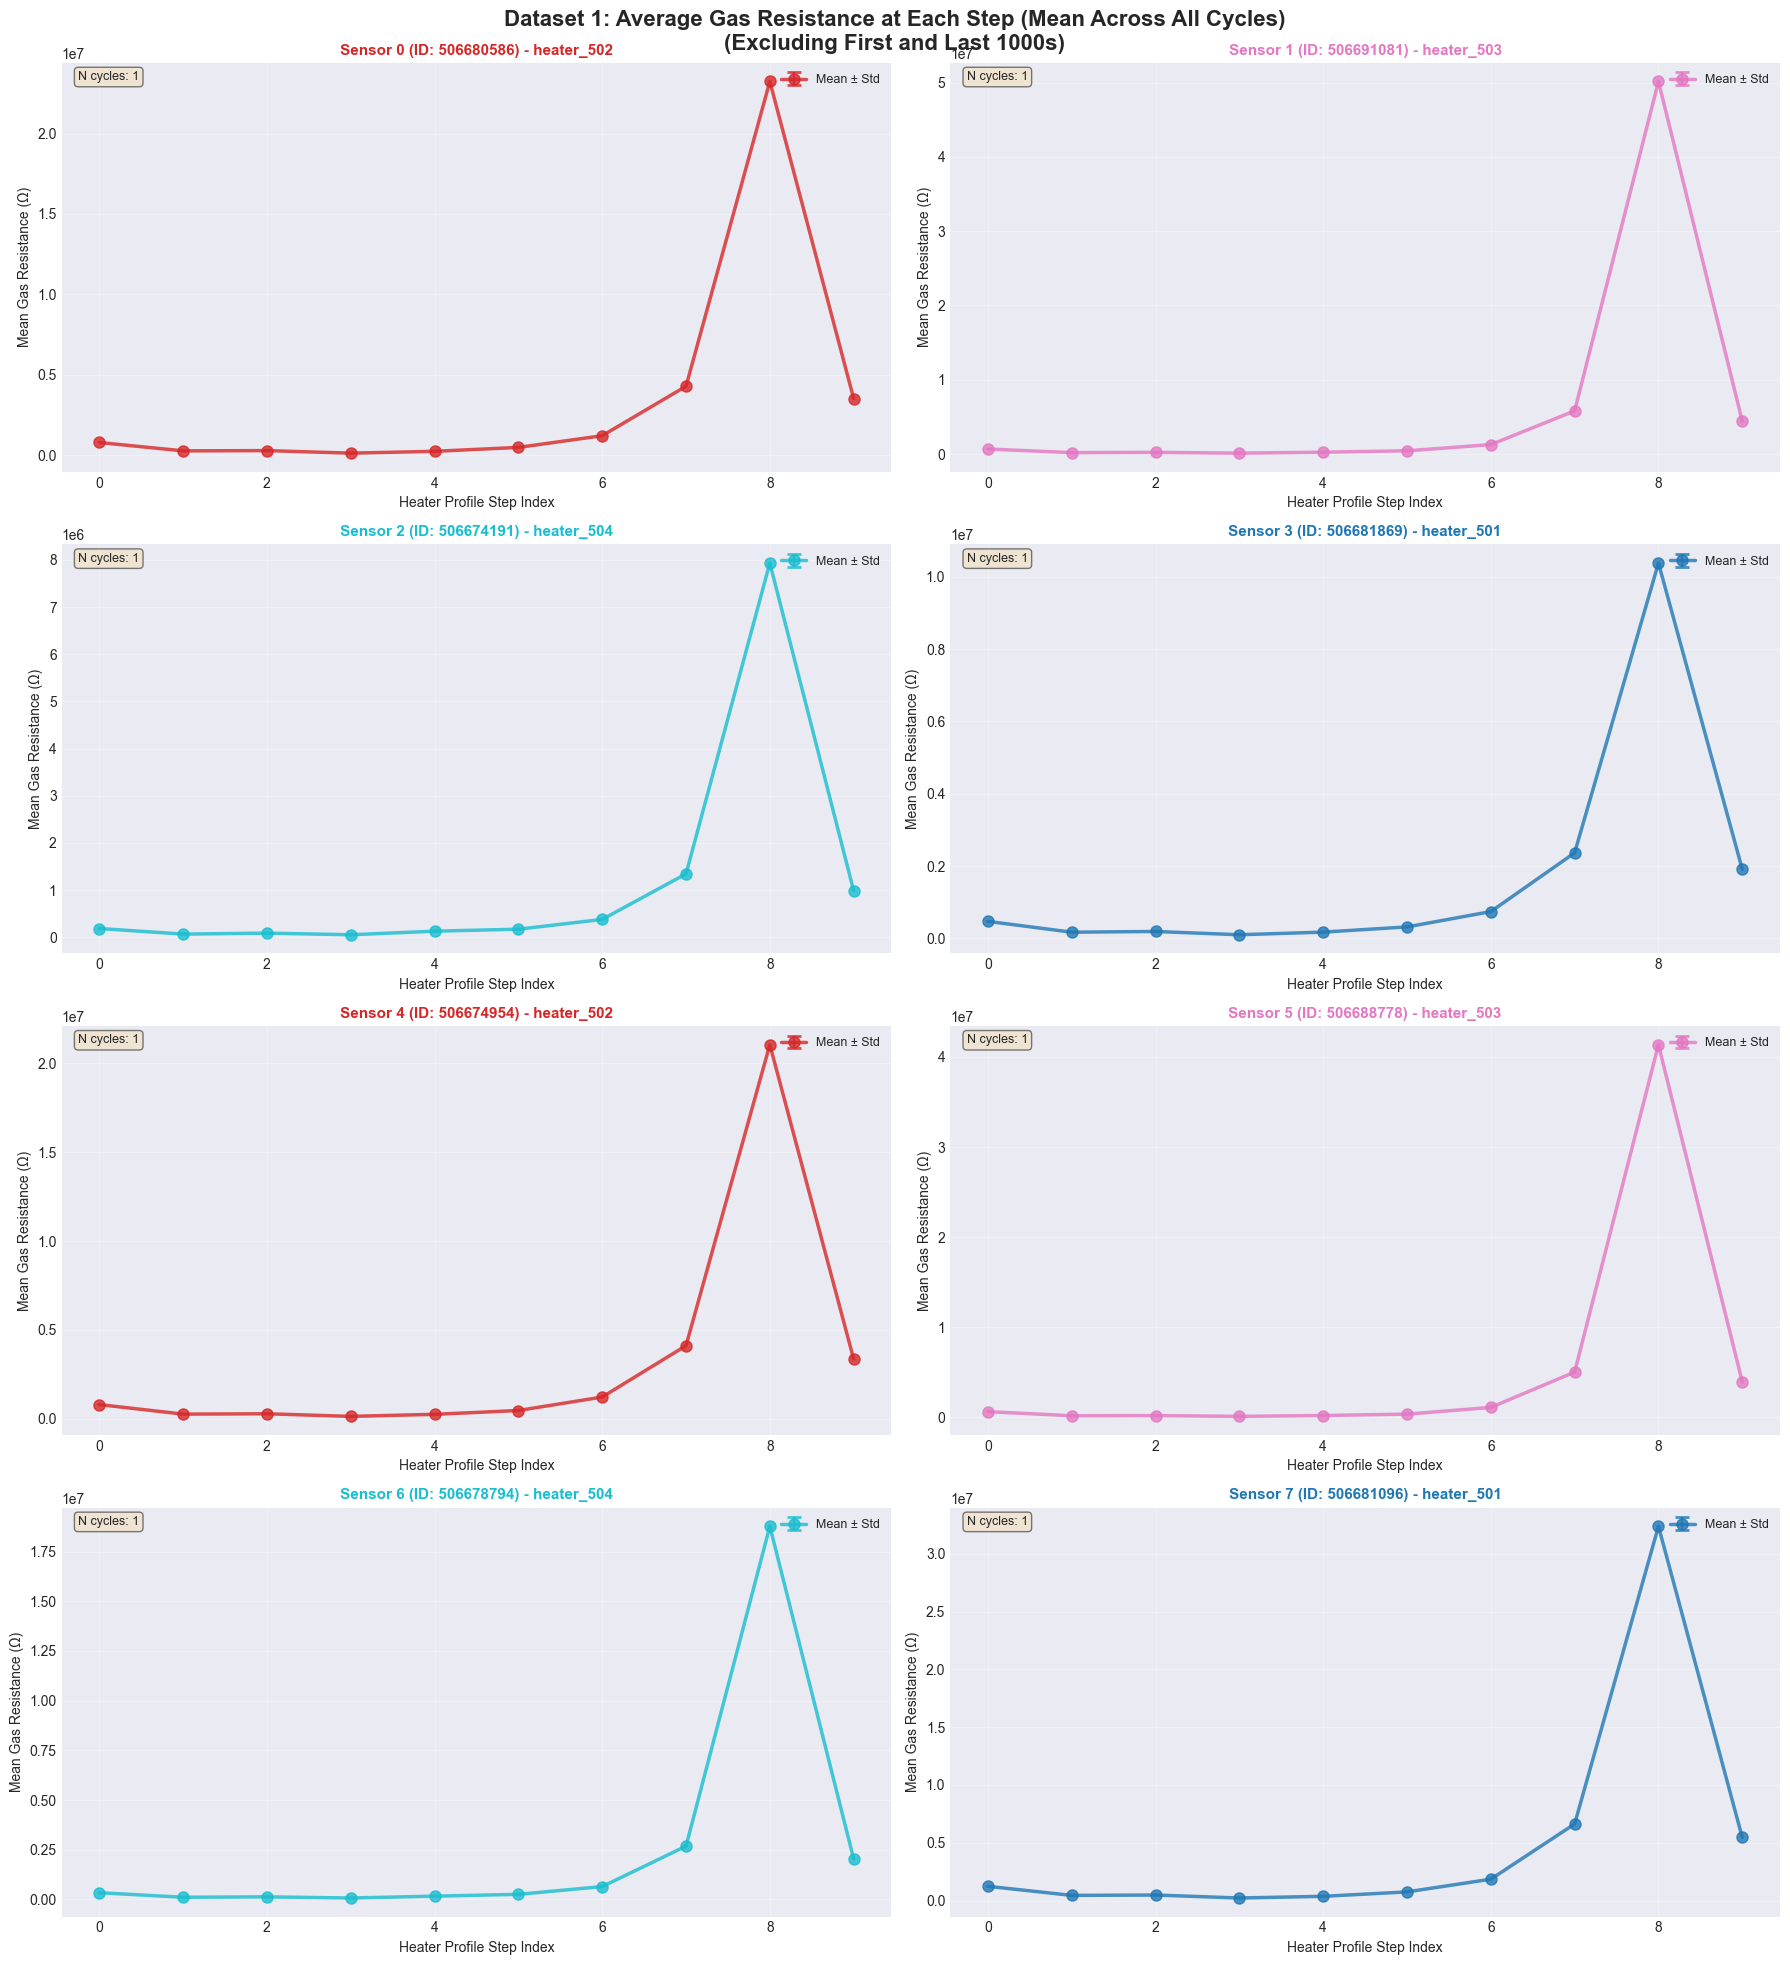


Dataset 1: Average step responses plotted for all sensors


In [22]:
# Dataset 1: Plot average step response (mean of all cycles) for each sensor
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('Dataset 1: Average Gas Resistance at Each Step (Mean Across All Cycles)\n(Excluding First and Last 1000s)', 
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
profiles1 = sorted(df1['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles1)))
profile_colors = dict(zip(profiles1, colors))

for i, sensor_idx in enumerate(sorted(df1['Sensor Index'].unique())):
    ax = axes_flat[i]
    
    # Calculate cycle means for this sensor
    cycle_means = calculate_cycle_means(df1, sensor_idx, exclude_seconds=1000)
    
    if len(cycle_means) == 0:
        ax.text(0.5, 0.5, 'No data after trimming', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Sensor {sensor_idx}', fontweight='bold')
        continue
    
    # Get sensor info
    sensor_id = df1[df1['Sensor Index'] == sensor_idx]['Sensor ID'].iloc[0]
    profile = sensor_profile_map1[sensor_idx]
    
    # Calculate average across all cycles for each step
    avg_step_response = cycle_means.groupby('Heater Profile Step Index').agg({
        'Resistance Gassensor': ['mean', 'std'],
        'Temperature': 'mean'
    }).reset_index()
    
    # Flatten column names
    avg_step_response.columns = ['Step', 'Gas_Resistance_Mean', 'Gas_Resistance_Std', 'Temperature_Mean']
    
    # Plot with error bars
    ax.errorbar(avg_step_response['Step'], 
                avg_step_response['Gas_Resistance_Mean'],
                yerr=avg_step_response['Gas_Resistance_Std'],
                marker='o',
                color=profile_colors[profile],
                linewidth=2.5,
                markersize=8,
                capsize=5,
                capthick=2,
                elinewidth=1.5,
                alpha=0.8,
                label='Mean ± Std')
    
    ax.set_title(f'Sensor {sensor_idx} (ID: {sensor_id}) - {profile}', 
                fontweight='bold',
                color=profile_colors[profile],
                fontsize=11)
    ax.set_xlabel('Heater Profile Step Index', fontsize=10)
    ax.set_ylabel('Mean Gas Resistance (Ω)', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax.legend(fontsize=9, loc='best')
    
    # Add text with number of cycles averaged
    n_cycles = len(cycle_means['Scanning Cycle Index'].unique())
    ax.text(0.02, 0.98, f'N cycles: {n_cycles}', 
            transform=ax.transAxes, 
            fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nDataset 1: Average step responses plotted for all sensors")


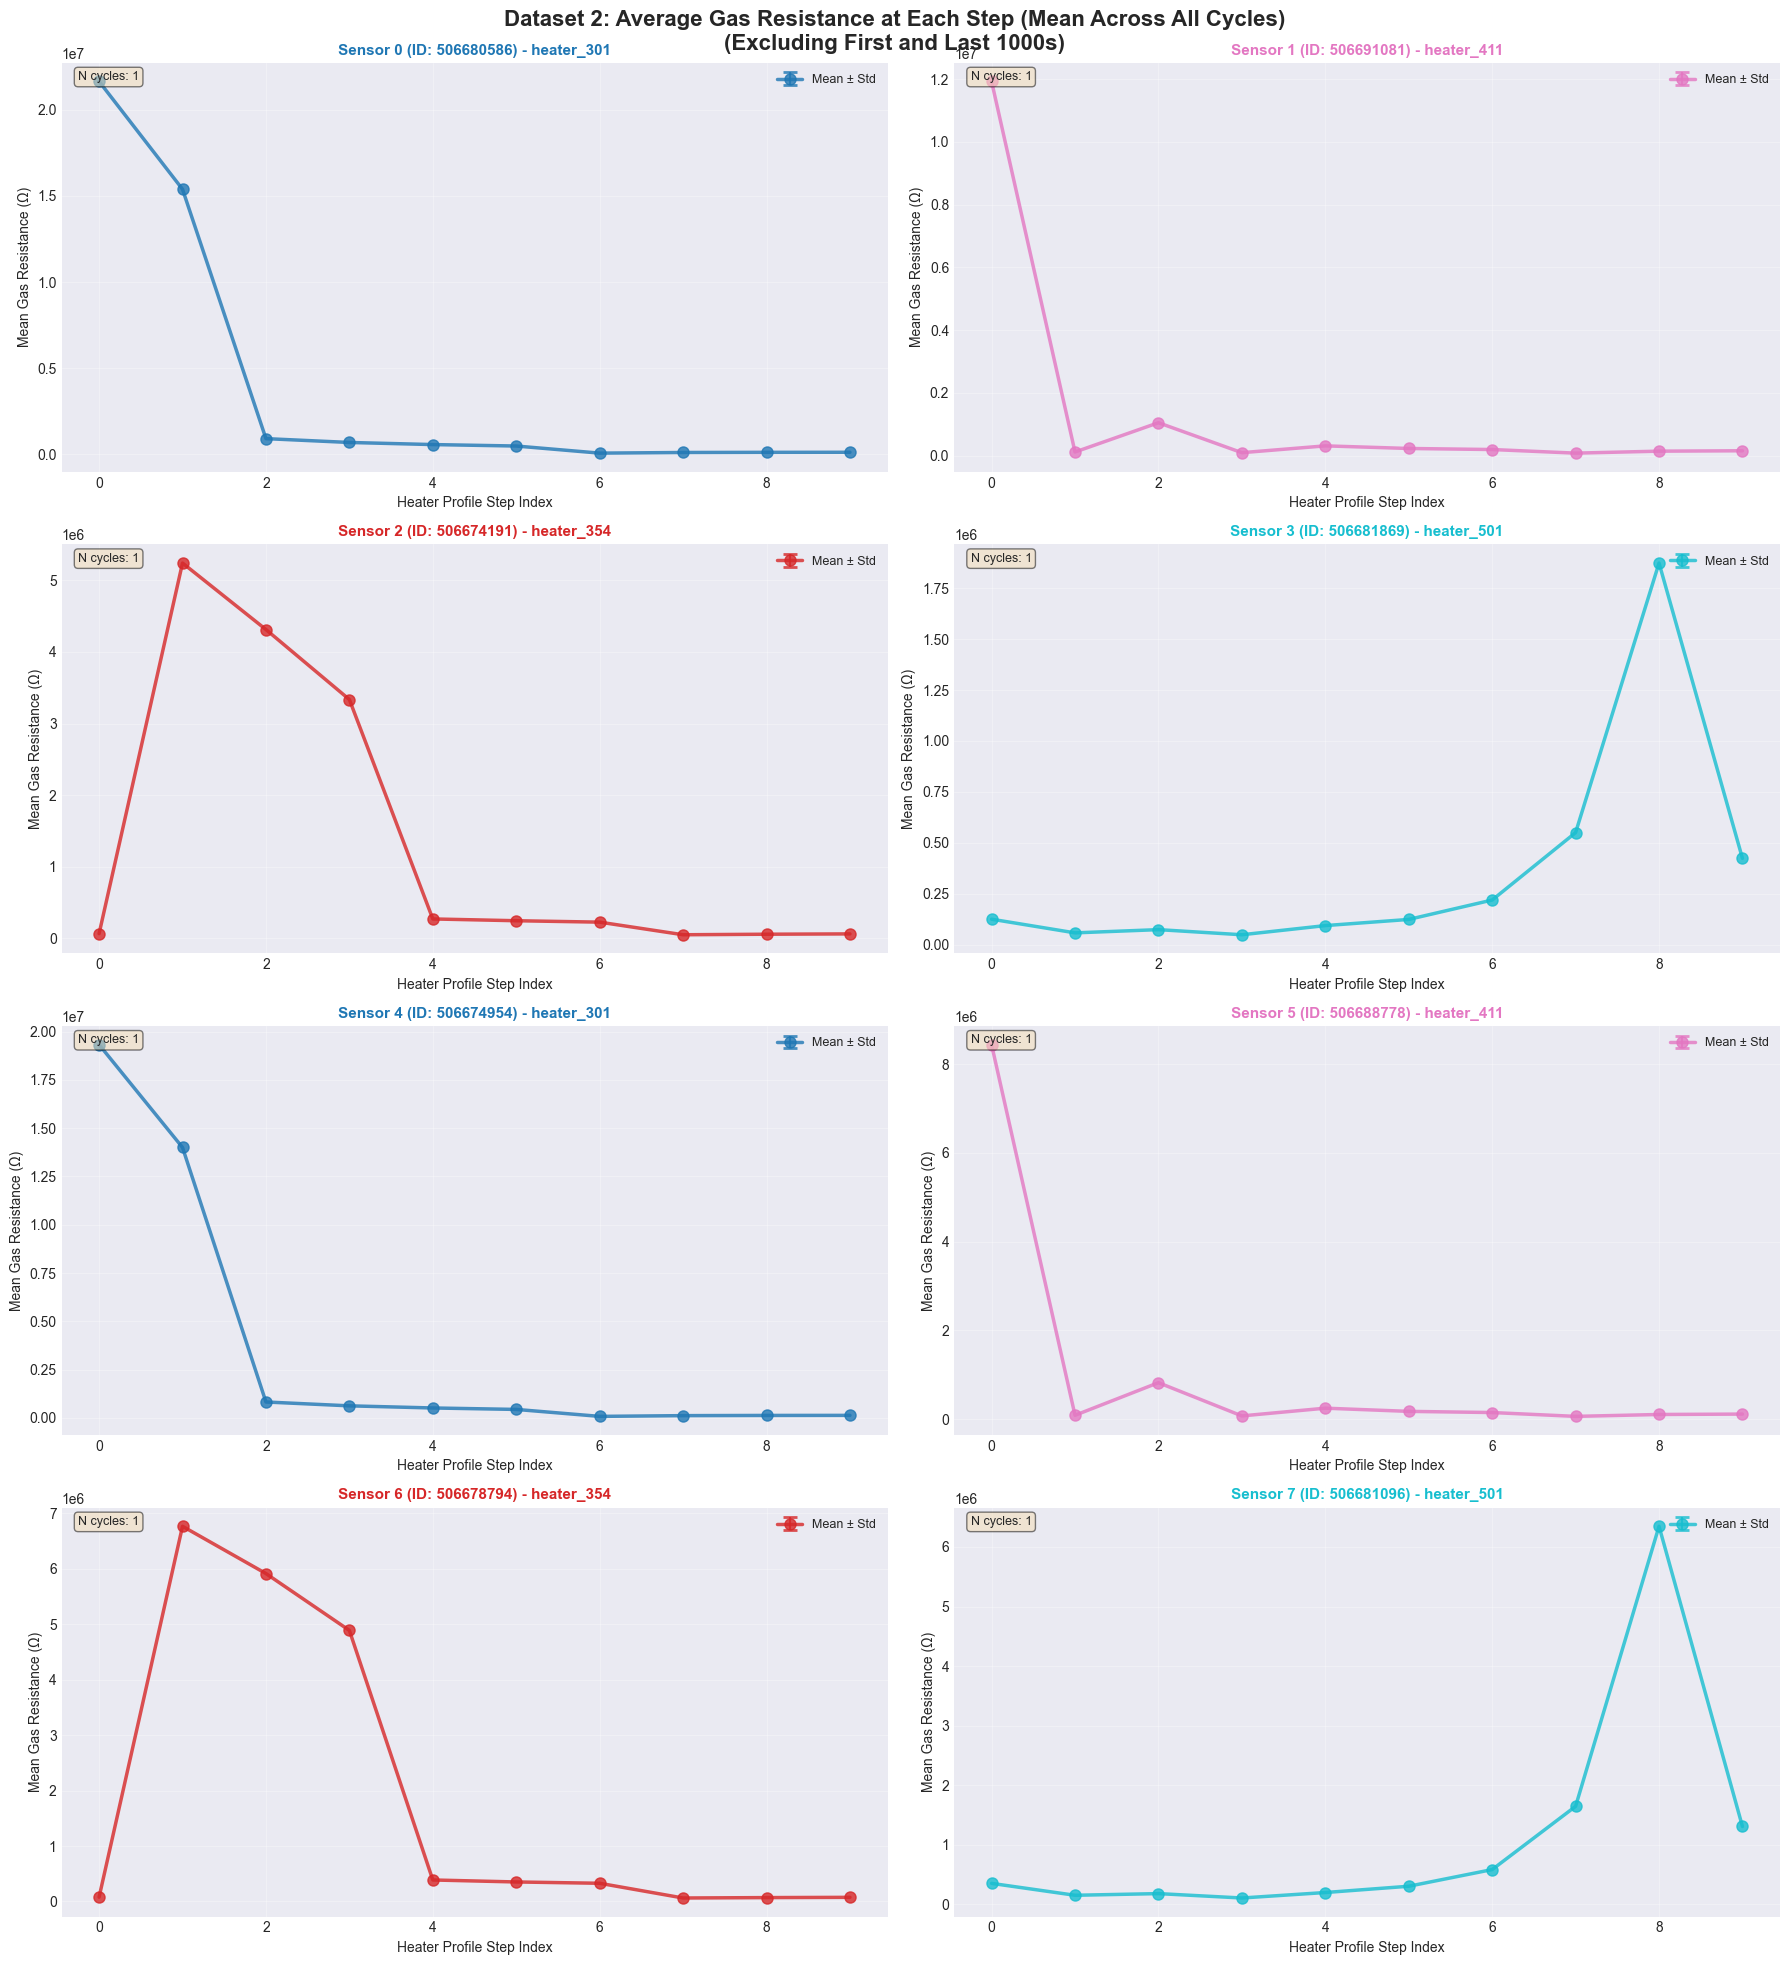


Dataset 2: Average step responses plotted for all sensors


In [23]:
# Dataset 2: Plot average step response (mean of all cycles) for each sensor
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle('Dataset 2: Average Gas Resistance at Each Step (Mean Across All Cycles)\n(Excluding First and Last 1000s)', 
             fontsize=16, fontweight='bold')

axes_flat = axes.flatten()
profiles2 = sorted(df2['Heater_Profile'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(profiles2)))
profile_colors = dict(zip(profiles2, colors))

for i, sensor_idx in enumerate(sorted(df2['Sensor Index'].unique())):
    ax = axes_flat[i]
    
    # Calculate cycle means for this sensor
    cycle_means = calculate_cycle_means(df2, sensor_idx, exclude_seconds=1000)
    
    if len(cycle_means) == 0:
        ax.text(0.5, 0.5, 'No data after trimming', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Sensor {sensor_idx}', fontweight='bold')
        continue
    
    # Get sensor info
    sensor_id = df2[df2['Sensor Index'] == sensor_idx]['Sensor ID'].iloc[0]
    profile = sensor_profile_map2[sensor_idx]
    
    # Calculate average across all cycles for each step
    avg_step_response = cycle_means.groupby('Heater Profile Step Index').agg({
        'Resistance Gassensor': ['mean', 'std'],
        'Temperature': 'mean'
    }).reset_index()
    
    # Flatten column names
    avg_step_response.columns = ['Step', 'Gas_Resistance_Mean', 'Gas_Resistance_Std', 'Temperature_Mean']
    
    # Plot with error bars
    ax.errorbar(avg_step_response['Step'], 
                avg_step_response['Gas_Resistance_Mean'],
                yerr=avg_step_response['Gas_Resistance_Std'],
                marker='o',
                color=profile_colors[profile],
                linewidth=2.5,
                markersize=8,
                capsize=5,
                capthick=2,
                elinewidth=1.5,
                alpha=0.8,
                label='Mean ± Std')
    
    ax.set_title(f'Sensor {sensor_idx} (ID: {sensor_id}) - {profile}', 
                fontweight='bold',
                color=profile_colors[profile],
                fontsize=11)
    ax.set_xlabel('Heater Profile Step Index', fontsize=10)
    ax.set_ylabel('Mean Gas Resistance (Ω)', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax.legend(fontsize=9, loc='best')
    
    # Add text with number of cycles averaged
    n_cycles = len(cycle_means['Scanning Cycle Index'].unique())
    ax.text(0.02, 0.98, f'N cycles: {n_cycles}', 
            transform=ax.transAxes, 
            fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nDataset 2: Average step responses plotted for all sensors")


## Summary of Cycle Means Analysis

The cycle means analysis provides:

1. **Individual Cycle Plots**: Shows how each cycle's mean gas resistance varies across heater profile steps
   - Each line represents one complete cycle
   - Different colors distinguish between cycles
   - Helps identify cycle-to-cycle variability

2. **Average Step Response**: Shows the typical sensor behavior averaged across all cycles
   - Error bars represent standard deviation across cycles
   - Shows consistency/reproducibility of sensor response
   - Cleaner visualization of the characteristic sensor profile

**Key Notes:**
- First and last 1000 seconds of each cycle are excluded to avoid edge effects
- Each sensor operates with a specific heater profile
- The x-axis shows the heater profile step index (different temperature/duration combinations)
- The y-axis shows gas sensor resistance in Ohms (scientific notation)


## Key Findings

### Dataset 1 (Profile Explorer-500s):
- **8 sensors** total (indices 0-7)
- **4 heater profiles** used: heater_501, heater_502, heater_503, heater_504
- Each pair of sensors shares a profile

### Dataset 2 (Profile Explorer-v1-D1):
- **8 sensors** total (indices 0-7)
- **4 heater profiles** used: heater_301, heater_354, heater_411, heater_501
- Each pair of sensors shares a profile
